# <center>Team Bible Final Project</center>
Created by Mert, Ari, and Artorius. Our goal of this project is to compare bible translations. For this project, we look at the KJV, NASB, NET, and TLB bibles. This notebook reflects our workbook for creating the visualizations and statistics found in our report. This notebook is not meant to be a stand-alone piece, rather a supplementary tool used to allow the reader to see our methods. Keep in mind that these cells are the product of our group's hard work, Stack Overflow, and ChatGPT. Please feel free to reach out if you feel out coding methodologies aren't well-constructed. Our goal with this document is to allow for both transparency and further understanding if the reader so wishes. 

Thank you, and we hope you enjoy.

The sources of our texts can be located at the following sites:
- https://drive.google.com/file/d/1fIaK8dEEK98FZtVcsOKs8zUoGG--up0m/view?usp=sharing
- https://github.com/tushortz/variety-bible-text/tree/master/bibles

### Part 1: Uploading the texts to data frames
Our goal here is to create data frames for each text such that we have one column called book_chapter, and another column for the text within those chapters. 

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# KJV
with open("data/kjv.txt", encoding="utf-8") as f:
    kjv_v = f.read().splitlines()

kjv_v = [line for line in kjv_v if line != "."]
kjv_book_chapter_verse = [re.search(r'[a-z]+ \d+:\d+', line).group() for line in kjv_v]
kjv_book = [re.search(r'\w+', chapter_verse).group() for chapter_verse in kjv_book_chapter_verse]
kjv_chapter = [re.search(r'\d+', chapter_verse).group() for chapter_verse in kjv_book_chapter_verse]
kjv_verse_number = [re.search(r'\d+$', line).group() for line in kjv_v]
kjv_verse_text = [re.sub(r'-- [a-z]+ \d+:\d+', '', line) for line in kjv_v]

kjv_df = pd.DataFrame({
    'book': kjv_book,
    'chapter': kjv_chapter,
    'verse': kjv_verse_number,
    'text': kjv_verse_text
})

# Create book_chapter column
kjv_df.name = 'KJV'
kjv_df = kjv_df.groupby(['book', 'chapter']).agg({'text': ' '.join}).reset_index()
kjv_df['book_chapter'] = kjv_df[['book', 'chapter']].apply(lambda x: ' '.join(x), axis=1)
kjv_df.drop(['book', 'chapter'], axis=1, inplace=True)
kjv_df = kjv_df.iloc[:, [1, 0]]

# extract gospels
kjv_gospels = kjv_df[kjv_df['book_chapter'].str.contains('matthew|mark|luke|john')].reset_index(drop=True)

In [3]:
# NASB
with open("data/nasb.txt", encoding="utf-8") as f:
    nasb_v = f.read().splitlines()

nasb_v = [line for line in nasb_v if line != "."]
nasb_book_chapter_verse = [re.search(r'[a-z]+ \d+:\d+', line).group() for line in nasb_v]
nasb_book = [re.search(r'\w+', line).group() for line in nasb_book_chapter_verse]
nasb_chapter = [re.search(r'\d+', line).group() for line in nasb_book_chapter_verse]
nasb_verse_number = [re.search(r'\d+$', line).group() for line in nasb_v]
nasb_verse_text = [re.sub(r'-- [a-z]+ \d+:\d+', '', line) for line in nasb_v]

nasb_df = pd.DataFrame({
    "book": nasb_book,
    "chapter": nasb_chapter,
    "verse": nasb_verse_number,
    "text": nasb_verse_text
})

nasb_df.name = 'NASB'
nasb_df = nasb_df.groupby(['book', 'chapter']).agg({'text': ' '.join}).reset_index()
nasb_df['book_chapter'] = nasb_df[['book', 'chapter']].apply(lambda x: ' '.join(x), axis=1)
nasb_df.drop(['book', 'chapter'], axis=1, inplace=True)
nasb_df = nasb_df.iloc[:, [1, 0]]

# gospels
# extract gospels
nasb_gospels = nasb_df[nasb_df['book_chapter'].str.contains('matthew|mark|luke|john')].reset_index(drop=True)

In [4]:
# NET
with open("data/net.txt", encoding="utf-8") as f:
    net_v = f.read().splitlines()

net_v = [line for line in net_v if line != "."]
net_book_chapter_verse = [re.search(r'[a-z]+ \d+:\d+', line).group() for line in net_v]
net_book = [re.search(r'\w+', line).group() for line in net_book_chapter_verse]
net_chapter = [re.search(r'\d+', line).group() for line in net_book_chapter_verse]
net_verse_number = [re.search(r'\d+$', line).group() for line in net_v]
net_verse_text = [re.sub(r'-- [a-z]+ \d+:\d+', '', line) for line in net_v]

net_df = pd.DataFrame({
    "book": net_book,
    "chapter": net_chapter,
    "verse": net_verse_number,
    "text": net_verse_text
})

net_df.name = 'NET'
net_df = net_df.groupby(['book', 'chapter']).agg({'text': ' '.join}).reset_index()
net_df['book_chapter'] = net_df[['book', 'chapter']].apply(lambda x: ' '.join(x), axis=1)
net_df.drop(['book', 'chapter'], axis=1, inplace=True)
net_df = net_df.iloc[:, [1, 0]]

# extract gospels
net_gospels = net_df[net_df['book_chapter'].str.contains('matthew|mark|luke|john')].reset_index(drop=True)

In [5]:
# TLB
with open("data/living.txt", encoding="utf-8") as f:
    living_v = f.read().splitlines()

start_living = living_v.index("Genesis 1")
end_living = living_v.index("21 The grace of our Lord Jesus Christ be with you all. Amen!")
living_v = living_v[start_living:end_living+1]

living_chapters = [i for i in range(len(living_v)) if re.search(r'^([0-9] )?[A-z][a-z]* \d*$', living_v[i])]
living_chapters += [len(living_v)]
living_chapters = sorted(living_chapters + [i for i in range(len(living_v)) if re.search(r'Song of Solomon \d*$', living_v[i])])
living_df = pd.DataFrame(columns=["book_chapter", "text"])
living_df.name = 'TLB'

for i in range(len(living_chapters)-1):
    book_chapter = living_v[living_chapters[i]].lower()
    if book_chapter[0].isdigit():
        book_chapter = book_chapter.split(' ', 1)[1]
    start = living_chapters[i] + 1
    end = living_chapters[i+1] - 1
    chapter_lines_v = living_v[start:end]
    chapter_text = ' '.join(chapter_lines_v)
    
    row = pd.DataFrame([[book_chapter, chapter_text]], columns=["book_chapter", "text"])
    living_df = pd.concat([living_df, row], ignore_index=True)

# order like the others
living_df = living_df.sort_values(by='book_chapter')
living_df = living_df.groupby(['book_chapter']).agg({'text': ' '.join}).reset_index()

# extract gospels
living_gospels = living_df[living_df['book_chapter'].str.contains('matthew|mark|luke|john')].reset_index(drop=True)

Fixing John

In [6]:
living_gospels.loc[16, 'text'] = "Afterwards Jesus returned to Jerusalem for one of the Jewish religious holidays. 2 Inside the city, near the Sheep Gate, was Bethesda Pool, with five covered platforms or porches surrounding it. 3 Crowds of sick folks—lame, blind, or with paralyzed limbs—lay on the platforms (waiting for a certain movement of the water, 4 for an angel of the Lord came from time to time and disturbed the water, and the first person to step down into it afterwards was healed).*  5 One of the men lying there had been sick for thirty-eight years. 6 When Jesus saw him and knew how long he had been ill, he asked him, “Would you like to get well?”  7 “I can’t,” the sick man said, “for I have no one to help me into the pool at the movement of the water. While I am trying to get there, someone else always gets in ahead of me.”  8 Jesus told him, “Stand up, roll up your sleeping mat and go on home!”  9 Instantly, the man was healed! He rolled up the mat and began walking!  But it was on the Sabbath when this miracle was done. 10 So the Jewish leaders objected. They said to the man who was cured, “You can’t work on the Sabbath! It’s illegal to carry that sleeping mat!”  11 “The man who healed me told me to,” was his reply.  12 “Who said such a thing as that?” they demanded.  13 The man didn’t know, and Jesus had disappeared into the crowd. 14 But afterwards Jesus found him in the Temple and told him, “Now you are well; don’t sin as you did before,* or something even worse may happen to you.”  15 Then the man went to find the Jewish leaders and told them it was Jesus who had healed him.  16 So they began harassing Jesus as a Sabbath breaker.  17 But Jesus replied, “My Father constantly does good, and I’m following his example.”*  18 Then the Jewish leaders were all the more eager to kill him because in addition to disobeying their Sabbath laws, he had spoken of God as his Father, thereby making himself equal with God.  19 Jesus replied, “The Son can do nothing by himself. He does only what he sees the Father doing, and in the same way. 20 For the Father loves the Son, and tells him everything he is doing; and the Son will do far more awesome miracles than this man’s healing. 21 He will even raise from the dead anyone he wants to, just as the Father does. 22 And the Father leaves all judgment of sin to his Son, 23 so that everyone will honor the Son, just as they honor the Father. But if you refuse to honor God’s Son, whom he sent to you, then you are certainly not honoring the Father.  24 “I say emphatically that anyone who listens to my message and believes in God who sent me has eternal life, and will never be damned for his sins, but has already passed out of death into life.  25 “And I solemnly declare that the time is coming, in fact, it is here, when the dead shall hear my voice—the voice of the Son of God—and those who listen shall live. 26 The Father has life in himself, and has granted his Son to have life in himself, 27 and to judge the sins of all mankind because he is the Son of Man. 28 Don’t be so surprised! Indeed the time is coming when all the dead in their graves shall hear the voice of God’s Son, 29 and shall rise again—those who have done good, to eternal life; and those who have continued in evil, to judgment.  30 “But I pass no judgment without consulting the Father. I judge as I am told. And my judgment is absolutely fair and just, for it is according to the will of God who sent me and is not merely my own.  31 “When I make claims about myself they aren’t believed, 32-33 but someone else, yes, John the Baptist,* is making these claims for me too. You have gone out to listen to his preaching, and I can assure you that all he says about me is true! 34 But the truest witness I have is not from a man, though I have reminded you about John’s witness so that you will believe in me and be saved. 35 John shone brightly for a while, and you benefited and rejoiced, 36 but I have a greater witness than John. I refer to the miracles I do; these have been assigned me by the Father, and they prove that the Father has sent me. 37 And the Father himself has also testified about me, though not appearing to you personally, or speaking to you directly. 38 But you are not listening to him, for you refuse to believe me—the one sent to you with God’s message.  39 “You search the Scriptures, for you believe they give you eternal life. And the Scriptures point to me! 40 Yet you won’t come to me so that I can give you this life eternal!  41-42 “Your approval or disapproval means nothing to me, for as I know so well, you don’t have God’s love within you. 43 I know, because I have come to you representing my Father and you refuse to welcome me, though you readily enough receive those who aren’t sent from him, but represent only themselves! 44 No wonder you can’t believe! For you gladly honor each other, but you don’t care about the honor that comes from the only God!  45 “Yet it is not I who will accuse you of this to the Father—Moses will! Moses, on whose laws you set your hopes of heaven. 46 For you have refused to believe Moses. He wrote about me, but you refuse to believe him, so you refuse to believe in me. 47 And since you don’t believe what he wrote, no wonder you don’t believe me either.”" 

### Part 2: Word Counts

It is here that we will begin looking at some general metrics in order to explore where the four books really differ, or don't differ at all. The point of this is to be a breadth-first search.

Word counts by chapter:

In [7]:
dataframes = [nasb_df, net_df, living_df, kjv_df]
dataframes_names = ['nasb_df', 'net_df', 'living_df', 'kjv_df']
means = []

for i, df in enumerate(dataframes):
    # Concatenate book_chapter and text columns
    df['chapter_text'] = df['book_chapter'].astype(str) + ": " + df['text']

    # Get word counts by chapter
    word_counts = df['chapter_text'].apply(lambda x: len(x.split()))

    # Create a new data frame with chapter titles and word counts
    chapter_word_counts = pd.DataFrame({'chapter': df['book_chapter'], 'word_count': word_counts})

    # Calculate the mean word count
    mean_word_count = chapter_word_counts['word_count'].mean()
    means.append(mean_word_count)

for name, mean in zip(dataframes_names, means):
    print(f"{name} mean word count per chapter: {mean:.2f}")

nasb_df mean word count per chapter: 739.44
net_df mean word count per chapter: 720.74
living_df mean word count per chapter: 684.04
kjv_df mean word count per chapter: 753.60


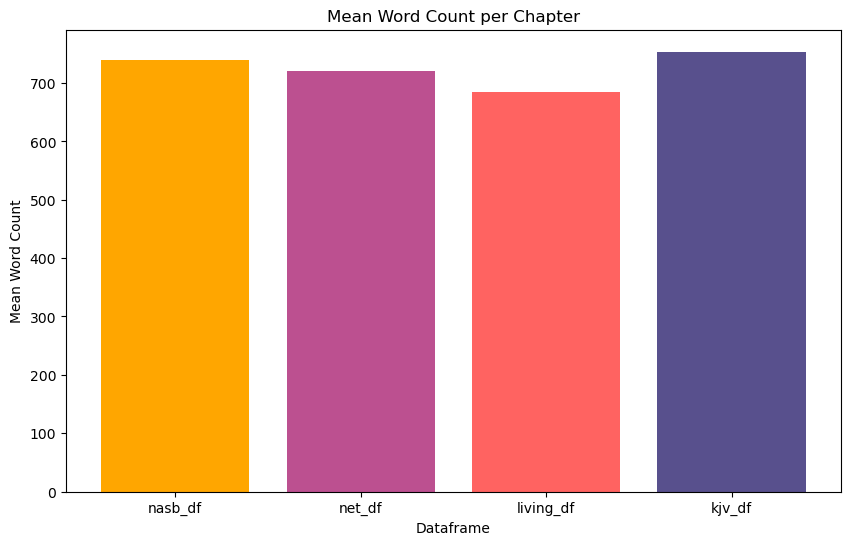

In [8]:
colors = ['#FFa600', '#bc5090', '#ff6361', '#58508d']

plt.figure(figsize=(10, 6))
plt.bar(dataframes_names, means, color=colors)
plt.xlabel('Dataframe')
plt.ylabel('Mean Word Count')
plt.title('Mean Word Count per Chapter')

plt.show()

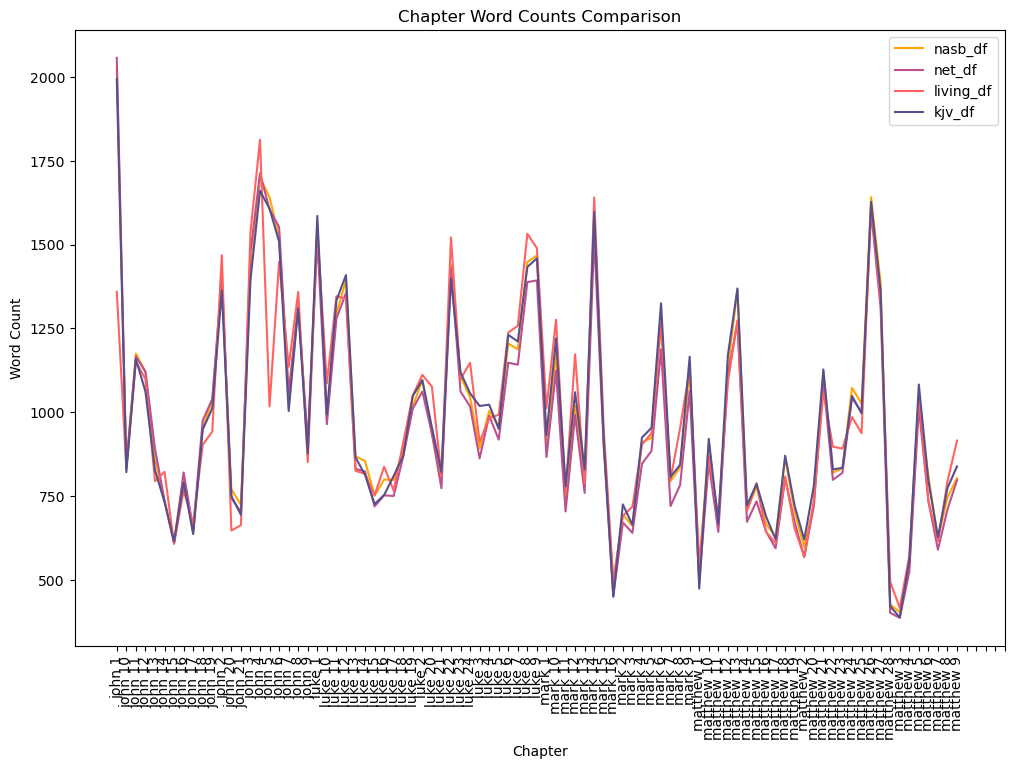

In [9]:
gospels = [nasb_gospels, net_gospels, living_gospels, kjv_gospels]
gospels_names = ['nasb_gospels', 'net_gospels', 'living_gospels', 'kjv_gospels']

plt.figure(figsize=(12, 8))
plt.title('Chapter Word Counts Comparison')
plt.xlabel('Chapter')
plt.ylabel('Word Count')

for i, df in enumerate(gospels):
    df['chapter_text'] = df['book_chapter'].astype(str) + ": " + df['text']
    word_counts = df['chapter_text'].apply(lambda x: len(x.split()))
    chapter_word_counts = pd.DataFrame({'chapter': df['book_chapter'], 'word_count': word_counts})
    plt.plot(chapter_word_counts['chapter'], chapter_word_counts['word_count'], color=colors[i], label=dataframes_names[i])

# Set x-ticks to each chapter number
plt.xticks(range(0, len(chapter_word_counts)+5), rotation=90)

# Add legend and show the plot
plt.legend()
plt.show()

### Part 3: Word Frequencies
In order to compute word frequencies we will generate wordclouds for the most frequently used words. To save computational power this is completed on the gospels of each text.

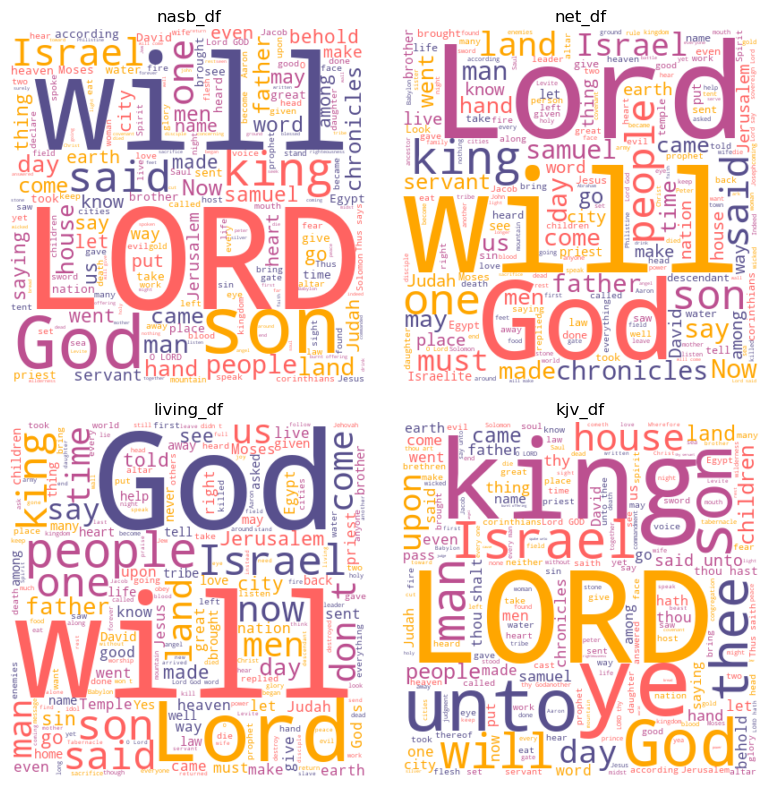

In [10]:
from wordcloud import WordCloud, STOPWORDS
import itertools

def generate_wordcloud(df, name, colors, ax):
    text = ' '.join(df['chapter_text'].tolist())
    wordcloud = WordCloud(width=400, height=400, background_color='white', color_func=lambda *args, **kwargs: next(colors), stopwords=STOPWORDS).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(name)
    
colors = itertools.cycle(['#FFa600', '#bc5090', '#ff6361', '#58508d'])
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for i, df in enumerate(dataframes):
    df.name = f"DataFrame{i}"  # Set the name of the dataframe
    row = i // 2  # Determine the row of the subplot
    col = i % 2   # Determine the column of the subplot
    generate_wordcloud(df, dataframes_names[i], colors, axs[row, col])

plt.tight_layout()
plt.show()

### Part 4: Part of Speech 

Now we will use spacy to compute the part of speech breakdowns of each bible. This is for the gospels only to (again) save computational power.

Here are the guides for spacy abbreviations: 
SPACE: Space or whitespace character,
SCONJ: Subordinating conjunction,
PRON: Pronoun,
ADV: Adverb,
VERB: Verb,
PUNCT: Punctuation mark,
PROPN: Proper noun,
NOUN: Noun,
ADP: Adposition,
AUX: Auxiliary verb,
ADJ: Adjective,
CCONJ: Coordinating conjunction,
NUM: Number,
PART: Particle,
DET: Determiner,
SYM: Symbol,
INTJ: Interjection,
X: Other

In [11]:
import spacy
import pandas as pd

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Define a function to analyze the parts of speech in a text
def analyze_pos(text):
    doc = nlp(text)
    pos_counts = doc.count_by(spacy.attrs.POS)
    pos_labels = {pos: nlp.vocab[pos].text for pos in pos_counts.keys()}
    pos_freqs = {pos_labels[pos]: pos_counts[pos] for pos in pos_counts.keys()}
    return pos_freqs

# Living gospels
pos_counts = {}
for row in living_gospels.itertuples():
    pos = analyze_pos(row.text)
    for key in pos:
        if key in pos_counts:
            pos_counts[key] += pos[key]
        else:
            pos_counts[key] = pos[key]
pos_counts_df = pd.DataFrame.from_dict(pos_counts, orient='index', columns=['Count'])

# All data frames
for i, df in enumerate(gospels):
    pos_counts = {}
    for row in df.itertuples():
        pos = analyze_pos(row.text)
        for key in pos:
            if key in pos_counts:
                pos_counts[key] += pos[key]
            else:
                pos_counts[key] = pos[key]
    pos_counts_df[gospels_names[i]] = pd.Series(pos_counts)

# delete the repeat <3
pos_counts_df.drop('Count', axis=1, inplace=True)

pos_init = pos_counts_df.copy()
pos_init

,nasb_gospels,net_gospels,living_gospels,kjv_gospels
SPACE,3695.0,3696.0,2260,3695.0
SCONJ,2970.0,2984.0,2842,3073.0
PRON,15556.0,14630.0,13749,14522.0
ADV,3091.0,3527.0,4389,3136.0
VERB,13718.0,13500.0,13401,13016.0
PUNCT,17490.0,15752.0,16385,15061.0
PROPN,4741.0,4483.0,5070,5280.0
NOUN,11063.0,11438.0,11419,12315.0
ADP,10240.0,9503.0,8978,9969.0
AUX,6990.0,6614.0,6507,5890.0


Now we want to normalize this data frame so it is proportional

In [12]:
pos_relative = pos_init.copy()

def count_total_words(text):
    doc = nlp(text)
    return len(doc)

for i, df in enumerate(gospels):
    total_words = df['text'].apply(count_total_words).sum()
    print(gospels_names[i], 'total word count:', total_words)
    
pos_relative['nasb_gospels'] = pos_init['nasb_gospels'].div(108988)
pos_relative['net_gospels'] = pos_init['net_gospels'].div(104645)
pos_relative['living_gospels'] = pos_init['living_gospels'].div(107764)
pos_relative['kjv_gospels'] = pos_init['kjv_gospels'].div(106359)

pos_relative

nasb_gospels total word count: 108988
net_gospels total word count: 104645
living_gospels total word count: 107764
kjv_gospels total word count: 106359


,nasb_gospels,net_gospels,living_gospels,kjv_gospels
SPACE,0.033903,0.035319,0.020972,0.034741
SCONJ,0.027251,0.028515,0.026372,0.028893
PRON,0.142731,0.139806,0.127584,0.136538
ADV,0.028361,0.033704,0.040728,0.029485
VERB,0.125867,0.129008,0.124355,0.122378
PUNCT,0.160476,0.150528,0.152045,0.141605
PROPN,0.043500,0.042840,0.047047,0.049643
NOUN,0.101507,0.109303,0.105963,0.115787
ADP,0.093955,0.090812,0.083312,0.093730
AUX,0.064136,0.063204,0.060382,0.055378


Now we want to track variance from kjv by computing each column minus kjv_gospels

In [13]:
variance_pos_df = pos_relative.copy()
variance_pos_df['nasb_gospels'] = pos_relative['nasb_gospels'] - pos_relative['kjv_gospels']
variance_pos_df['net_gospels'] = pos_relative['net_gospels'] - pos_relative['kjv_gospels']
variance_pos_df['living_gospels'] = pos_relative['living_gospels'] - pos_relative['kjv_gospels']

means = {}
means['nasb_gospels'] = variance_pos_df['nasb_gospels'].mean()
means['net_gospels'] = variance_pos_df['net_gospels'].mean()
means['living_gospels'] = variance_pos_df['living_gospels'].mean()

means

{'nasb_gospels': 1.0682580228901294e-18,
 'net_gospels': 1.6837021972716069e-18,
 'living_gospels': -0.00011790470243254635}

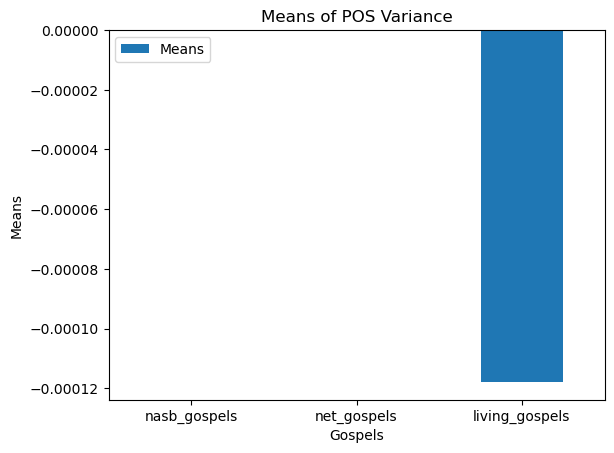

In [14]:
# Graph Means
means_df = pd.DataFrame.from_dict(means, orient='index', columns=['Means'])
means_df.plot(kind='bar', rot=0)
plt.xlabel('Gospels')
plt.ylabel('Means')
plt.title('Means of POS Variance')
plt.show()

Pie charts of POS distribution

In [15]:
pos_relative.drop(index=['SPACE', 'SCONJ', 'PUNCT', 'ADP', 'AUX', 'CCONJ', 'NUM', 'PART', 'DET', 'SYM', 'INTJ', 'X'], inplace=True)

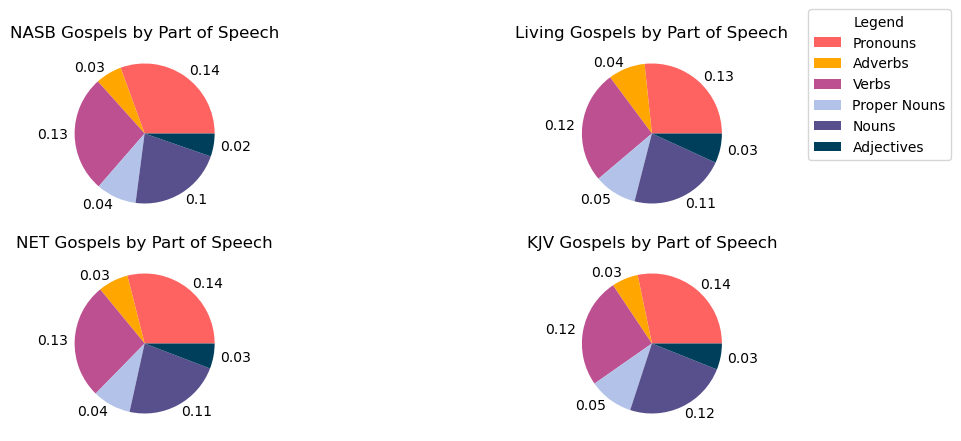

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

pos_labels = ['Pronouns', 'Adverbs', 'Verbs', 'Proper Nouns', 'Nouns', 'Adjectives']
plt.figure(figsize=(12, 5))
colors = ['#ff6361', '#FFa600', '#bc5090', '#b3c2e8', '#58508d', '#003f5c']
sns.set_palette(colors)

plt.subplot(2, 2, 1)
plt.pie(pos_relative['nasb_gospels'], labels=round(pos_relative['nasb_gospels'], 2))
plt.title("NASB Gospels by Part of Speech")

plt.subplot(2, 2, 2)
plt.pie(pos_relative['living_gospels'], labels=round(pos_relative['living_gospels'], 2))
plt.title("Living Gospels by Part of Speech")
plt.legend(pos_labels, title='Legend', bbox_to_anchor=(2.25, 1.25), loc='upper right')

plt.subplot(2, 2, 3)
plt.pie(pos_relative['net_gospels'], labels=round(pos_relative['net_gospels'], 2))
plt.title("NET Gospels by Part of Speech")

plt.subplot(2, 2, 4)
plt.pie(pos_relative['kjv_gospels'], labels=round(pos_relative['kjv_gospels'], 2))
plt.title("KJV Gospels by Part of Speech")

plt.show()

### Part 5: Euclidean Distance
Our goal here is to measure distance between texts using both Euclidean distance and lejdbhfkjbhk distance

KJV vs. NASB

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd

euclidean_scores = []

# KJV vs NASB
df1 = kjv_df.copy()
df2 = nasb_df.copy()

# Combine the text from both data frames
combined_text = pd.concat([df1['text'], df2['text']], axis=0)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Fit the vectorizer and transform the combined text data
tfidf_matrix = vectorizer.fit_transform(combined_text)

# Compute the Euclidean distance matrix
distance_matrix = euclidean_distances(tfidf_matrix[:len(df1)], tfidf_matrix[len(df1):])

# Get the Euclidean distance between the two data frames
euclidean_distance = distance_matrix[0, 0]

euclidean_scores.append(euclidean_distance)
print(f"Euclidean distance between KJV and NASB: {euclidean_distance}")

Euclidean distance between KJV and NASB: 0.6567772473239741


KJV vs. TLB

In [18]:
# KJV vs TLB
df2 = living_df.copy()

# Combine the text from both data frames
combined_text = pd.concat([df1['text'], df2['text']], axis=0)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Fit the vectorizer and transform the combined text data
tfidf_matrix = vectorizer.fit_transform(combined_text)

# Compute the Euclidean distance matrix
distance_matrix = euclidean_distances(tfidf_matrix[:len(df1)], tfidf_matrix[len(df1):])

# Get the Euclidean distance between the two data frames
euclidean_distance = distance_matrix[0, 0]

euclidean_scores.append(euclidean_distance)
print(f"Euclidean distance between KJV and TLB: {euclidean_distance}")

Euclidean distance between KJV and TLB: 0.8782618966249591


KJV vs. NET

In [19]:
# KJV vs NET
df2 = net_df.copy()

# Combine the text from both data frames
combined_text = pd.concat([df1['text'], df2['text']], axis=0)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Fit the vectorizer and transform the combined text data
tfidf_matrix = vectorizer.fit_transform(combined_text)

# Compute the Euclidean distance matrix
distance_matrix = euclidean_distances(tfidf_matrix[:len(df1)], tfidf_matrix[len(df1):])

# Get the Euclidean distance between the two data frames
euclidean_distance = distance_matrix[0, 0]

euclidean_scores.append(euclidean_distance)
print(f"Euclidean distance between KJV and NET: {euclidean_distance}")

Euclidean distance between KJV and NET: 0.7232256375715527


Now we graph

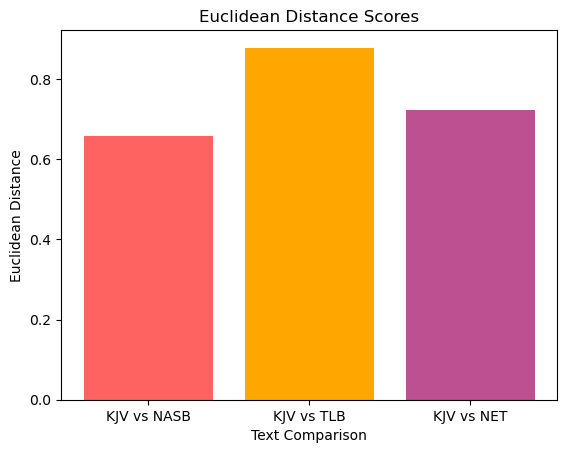

In [20]:
labels = ['KJV vs NASB', 'KJV vs TLB', 'KJV vs NET']

plt.bar(labels, euclidean_scores, color=colors)
plt.title('Euclidean Distance Scores')
plt.xlabel('Text Comparison')
plt.ylabel('Euclidean Distance')
plt.show()

### Part 6: Sentiment Analysis

In [21]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sentiment_scores_df = pd.DataFrame()
df1 = nasb_df.copy()
df2 = living_df.copy()
df3 = net_df.copy()
df4 = kjv_df.copy()

# Instantiate the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each text in the data frames
sentiment_scores_df['NASB'] = df1['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
sentiment_scores_df['TLB'] = df2['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
sentiment_scores_df['NET'] = df3['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
sentiment_scores_df['KJV'] = df4['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

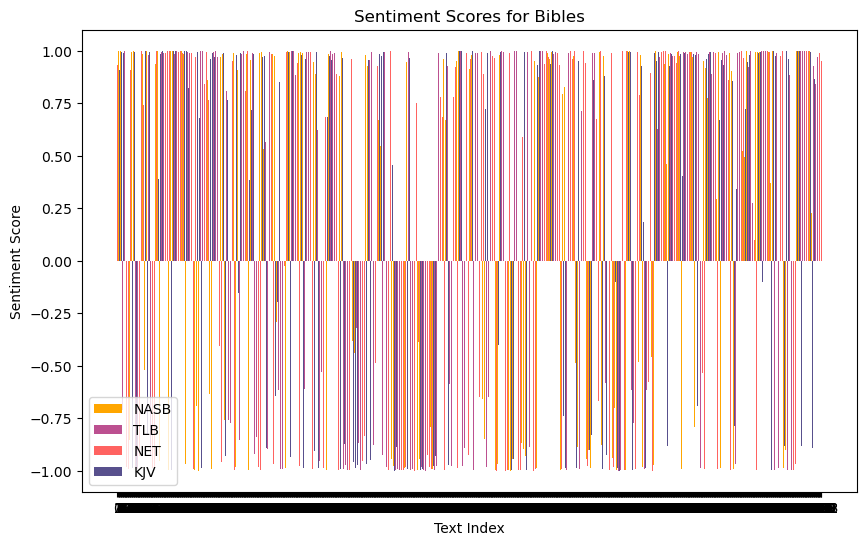

In [22]:
import numpy as np
import matplotlib.pyplot as plt

labels = sentiment_scores_df.index
x = np.arange(len(labels))
colors = ['#FFa600', '#bc5090', '#ff6361', '#58508d']

bar_width = 0.2
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5 * bar_width, sentiment_scores_df['NASB'], width=bar_width, label='NASB', color=colors[0])
plt.bar(x - 0.5 * bar_width, sentiment_scores_df['TLB'], width=bar_width, label='TLB', color=colors[1])
plt.bar(x + 0.5 * bar_width, sentiment_scores_df['NET'], width=bar_width, label='NET', color=colors[2])
plt.bar(x + 1.5 * bar_width, sentiment_scores_df['KJV'], width=bar_width, label='KJV', color=colors[3])

plt.xticks(x, labels)
plt.xlabel('Text Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores for Bibles')

plt.legend()
plt.show()

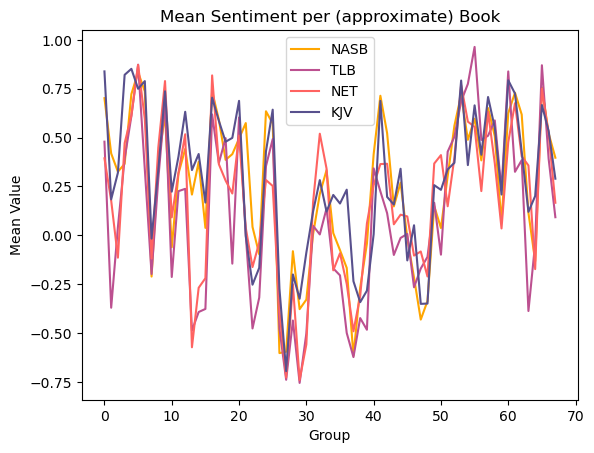

In [23]:
sentiment_scores_df['group'] = sentiment_scores_df.index // 16

# Group the data by the 'group' column and calculate the mean of each bible column
grouped_df = sentiment_scores_df.groupby('group').mean()

for i, column in enumerate(grouped_df.columns):
    plt.plot(grouped_df.index, grouped_df[column], label=column, color=colors[i])

plt.xlabel('Group')
plt.ylabel('Mean Value')
plt.title('Mean Sentiment per (approximate) Book')
plt.legend()
plt.show()

This graph is incredibly interesting because it shows that all of the bibles have similar ebbs and flows, but the Living Bible has consistently lower sentiment than the others. For further investigation, we want to look at group 18, because it has the most differentiation.

In [24]:
sentiment_scores_df[sentiment_scores_df['group'] == 18]

,NASB,TLB,NET,KJV,group
288,0.9350,-0.6083,0.9154,0.8364,18
289,0.9842,0.9985,0.9957,0.9597,18
290,0.9975,0.9945,0.9888,0.9789,18
291,0.9953,0.9948,0.9947,0.9918,18
292,0.9885,0.9976,0.9951,0.9947,18
293,0.9954,0.9299,0.9934,0.9180,18
294,0.9955,0.9953,0.9984,0.9721,18
295,-0.7640,0.8892,-0.9908,0.7992,18
296,0.9740,0.9924,0.9953,0.9816,18
297,0.9954,0.9883,0.9946,0.9858,18


According to the above indices, the section of the bible that is one of the most differentiated, is Genesis 25-35. Thus,
we will be looking into this during our close-reading.

### Part 7: Levenschtein Distance

For computational reasons, we decided to limit this exercise to strictly a really small sample derived from our sentiment analysis. Our sentiment analysis pointed to df indicies 288-303, so we will be completing our Levenschtein Distance on these.

In [25]:
import Levenshtein

df1 = nasb_df.iloc[288:303].copy()
df2 = living_df.iloc[288:303].copy()
df3 = net_df.iloc[288:303].copy()
df4 = kjv_df.iloc[288:303].copy()

lev_scores_df = pd.DataFrame()

# KJV vs NASB
temp_scores = []

for text1, text2 in zip(df4['text'], df1['text']):
    levenshtein_distance = Levenshtein.distance(text1, text2)
    temp_scores.append(levenshtein_distance)
        
lev_scores_df['nasb vs kjv'] = temp_scores

In [26]:
# KJV vs Living
temp_scores = []

for text1, text2 in zip(df4['text'], df2['text']):
    levenshtein_distance = Levenshtein.distance(text1, text2)
    temp_scores.append(levenshtein_distance)
        
lev_scores_df['tlb vs kjv'] = temp_scores

In [27]:
# KJV vs NET
temp_scores = []

for text1, text2 in zip(df4['text'], df3['text']):
    levenshtein_distance = Levenshtein.distance(text1, text2)
    temp_scores.append(levenshtein_distance)
        
lev_scores_df['net vs kjv'] = temp_scores

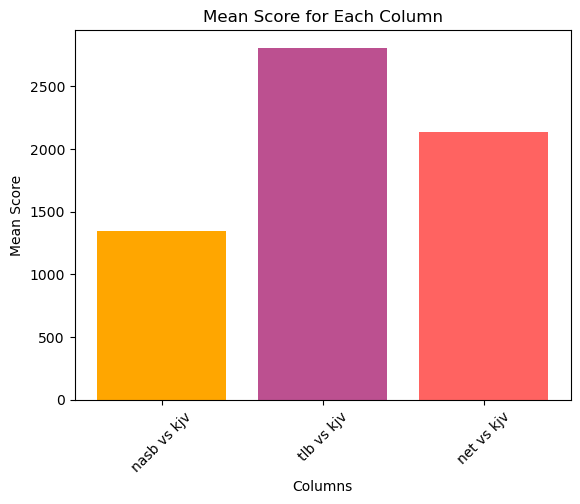

In [28]:
mean_scores = lev_scores_df.mean()

plt.bar(mean_scores.index, mean_scores.values, color=colors)
plt.xlabel('Columns')
plt.ylabel('Mean Score')
plt.title('Mean Score for Each Column')
plt.xticks(rotation=45)
plt.show()

Curiously enough, this almost exactly matches our results for echlon computation as well. Thus, it feels like this is a well-representative sample.

### Part 8: Topic Modeling
Lastly in our analysis, we wish to analyze not just the sentiment of the different bibles, but also the general content. We feel that the best way to do this is with our friend topic modeling!

Because we have not learned how to do topic modeling, we turned to ChatGPT for support. We modeled the code and stored it in the workbook ida_visualization files. Feel free to explore these topic as a supplementary portion of our project! When running correlation statistics we were unable to locate correlations in topics between **any** of the models. We assume that this is not due to the actual correlations, but rather our own computational limitations. Thus, we decided not to include the topic modelings in our formal report, but please feel free to view as supplementary information!

# <center>Conclusion</center>

Using our metrics above, we can determine that the Living Bible is very similar in structure to the King James version. Further, the words used show that the Living Bible has similar topics/themes to the KJV. However, where the Living Bible diverges from the other texts is **how** the words are used, as concluded by the sentiment analysis.

### Sources Cited

**Corpora**
- The New American Standard Bible (NASB) (1971)
  [NASB Text File](https://github.com/tushortz/variety-bible-text/blob/master/bibles/nasb.txt)
- New English Translation (NET) (2001)
  [NET Text File](https://github.com/tushortz/variety-bible-text/blob/master/bibles/net.txt)
- King James Version (KJV) (1611 AD)
  [KJV Text File](https://github.com/tushortz/variety-bible-text/blob/master/bibles/kjv.txt)
- The Living Bible (1971)
  [Living Bible Text File](https://drive.google.com/file/d/1fIaK8dEEK98FZtVcsOKs8zUoGG--up0m/view?usp=sharing)

**Research**
- Previously existing DH approaches
  - [Bible Study Tools](https://www.biblestudytools.com/compare-translations/)
  - [God's Word](https://godsword.org/pages/bible-translation-guide)
  - [NCBI](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4551210/)
  - [Chapter 3 Ministries](https://www.chapter3min.org/bible-translations-comparison-charts/)
- Bible Historical Background
  - [USCCB](https://www.usccb.org/offices/new-american-bible/approved-translations-bible)
  - [Bible Researcher](https://www.bible-researcher.com/nlt.html)
  - [Wikipedia](https://en.wikipedia.org/wiki/The_Living_Bible)
  - [The King's Bible](https://thekingsbible.com/Library/BibleHistory)
- Understanding Translation
  - [Sage Journals](https://journals.sagepub.com/doi/pdf/10.1177/0263276406063778?casa_token=TOuZB0tbsPcAAAAA:rn8yNPEsAVoUPniLU4XDKjrnD1sHJSoatxcYd4ZQsilJnUUaSjyZGfUM0EhdpIZ4sDzskTl9m5b9TA)
  - [GotQuestions.org](https://www.gotquestions.org/LORD-GOD-Lord-God.html)
  - [ACL Anthology](https://aclanthology.org/2007.tc-1.5.pdf)


<center>Thank you for viewing our project! We hope you enjoyed our openness, and if you have any inquiries about metrics used, feel free to email one of our group members at a.g.frank@wustl.edu.</center>

### <center>We wish you a 'blessed' day!</center>